<a href="https://colab.research.google.com/github/AhmadIsmail83N/MyData/blob/master/%D0%A0%D0%9A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("/content/sample_data/FIFA 2018 Statistics.csv")

In [3]:
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [4]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [5]:
data.shape

(128, 27)

In [6]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [0]:
d = data[["Corners", "Distance Covered (Kms)", "Round"]]
d = d.dropna(axis=0, how="any")

In [8]:
d.head()

,Corners,Distance Covered (Kms),Round
0,6,118,Group Stage
1,2,105,Group Stage
2,0,112,Group Stage
3,5,111,Group Stage
4,5,101,Group Stage


In [9]:
d.shape

(128, 3)

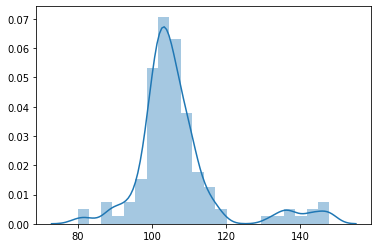

In [10]:
sns.distplot(d[["Distance Covered (Kms)"]]);

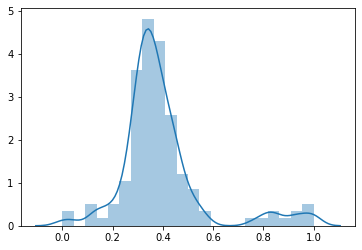

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_data = sc.fit_transform(d[["Distance Covered (Kms)"]])
sns.distplot(sc_data)

In [0]:
 d["Distance Covered (Kms)_SCALED"] = sc_data

Label encoding

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
Round_le = le.fit_transform(d["Round"])

In [25]:
np.unique(Round_le)

array([0, 1, 2, 3, 4, 5])

In [26]:
le.inverse_transform(np.unique(Round_le))

array(['3rd Place', 'Final', 'Group Stage', 'Quarter Finals',
       'Round of 16', 'Semi- Finals'], dtype=object)

In [0]:
d["Round_INDEX"] = Round_le

One Hot encoding

In [0]:
ohe = OneHotEncoder()
Round_ohe = ohe.fit_transform(d[["Round"]])

In [30]:
Round_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [31]:
d["Round"].head(10)

0    Group Stage
1    Group Stage
2    Group Stage
3    Group Stage
4    Group Stage
5    Group Stage
6    Group Stage
7    Group Stage
8    Group Stage
9    Group Stage
Name: Round, dtype: object

In [32]:
ohe_names = ohe.get_feature_names()
ohe_names

array(['x0_3rd Place', 'x0_Final', 'x0_Group Stage', 'x0_Quarter Finals',
       'x0_Round of 16', 'x0_Semi- Finals'], dtype=object)

In [0]:
for idx, name in enumerate(ohe_names):
    d[name] = Round_ohe[:, idx].todense()

Получившийся набор данных

In [35]:
d.head(10)

,Corners,Distance Covered (Kms),Round,Distance Covered (Kms)_SCALED,Round_INDEX,x0_3rd Place,x0_Final,x0_Group Stage,x0_Quarter Finals,x0_Round of 16,x0_Semi- Finals
0,6,118,Group Stage,0.558824,2,0.0,0.0,1.0,0.0,0.0,0.0
1,2,105,Group Stage,0.367647,2,0.0,0.0,1.0,0.0,0.0,0.0
2,0,112,Group Stage,0.470588,2,0.0,0.0,1.0,0.0,0.0,0.0
3,5,111,Group Stage,0.455882,2,0.0,0.0,1.0,0.0,0.0,0.0
4,5,101,Group Stage,0.308824,2,0.0,0.0,1.0,0.0,0.0,0.0
5,2,100,Group Stage,0.294118,2,0.0,0.0,1.0,0.0,0.0,0.0
6,4,102,Group Stage,0.323529,2,0.0,0.0,1.0,0.0,0.0,0.0
7,5,103,Group Stage,0.338235,2,0.0,0.0,1.0,0.0,0.0,0.0
8,5,103,Group Stage,0.338235,2,0.0,0.0,1.0,0.0,0.0,0.0
9,1,111,Group Stage,0.455882,2,0.0,0.0,1.0,0.0,0.0,0.0
